<a href="https://colab.research.google.com/github/it-math/analytica/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

students-grading-dataset
https://it-math.ru/wp-content/uploads/res_new.csv


In [ ]:
import pandas as pd                # манипуляция данными и анализ
import numpy as np                 # для численных расчетов
import matplotlib.pyplot as plt    # создание статических визуализаций
import seaborn as sns              # расширенная визуализация
import plotly.express as px        # интерактивные визуализации

# Configure default style for plots
sns.set_style("whitegrid")


In [ ]:
file_path = "https://it-math.ru/wp-content/uploads/res_new.csv"
df = pd.read_csv(file_path,sep=';')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df['Имя'].unique()

In [ ]:
for index, row in df.iterrows():
    if row['Имя'] in ('Иван', 'Даниил', 'Михаил', 'Артем','Александр'):
        df.loc[index, 'Пол'] = 'М'
    else:
        df.loc[index, 'Пол'] = 'Ж'

In [ ]:
df

In [ ]:
df=df.drop(columns='ID',axis=1)
df=df.drop(columns='Email',axis=1)

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
new_columns = ['name', 'fam', 'gender',	'age', 'dep', 'attendance', 'exam', 'final', 'avg', 'test', 'class', 'project', 'total', 'grade', 'study_hours',
              'active', 'internet', 'parent_edu', 'income', 'stress', 'sleep']
df.columns = new_columns

In [ ]:
df

In [ ]:
#df['avg'] = df['avg'].fillna(df['avg'].median())
df["avg"] = df["avg"].fillna(0)

In [ ]:
df

Пропуски

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["dep"], y=df["attendance"].isnull(), hue=df["gender"])
plt.show()

In [ ]:
df['parent_edu']=df['parent_edu'].fillna('Unknown')
df['attendance']=df['attendance'].fillna (df['attendance'].median())

In [ ]:
df

**Пересчитаем окончательный балл:**

In [ ]:
weights = {
    "attendance": 0.05,
    "exam": 0.15,
    "final": 0.30,
    "avg": 0.15,
    "test": 0.10,
    "class": 0.05,
    "project": 0.20
}
df['total'] = (
    df['attendance'] * weights['attendance'] +
    df["exam"] * weights["exam"] +
    df["final"] * weights["final"] +
    df["avg"] * weights["avg"] +
    df["test"] * weights["test"] +
    df["class"] * weights["class"] +
    df["project"] * weights["project"]
)

In [ ]:
df

Пересчет оценки по системе:

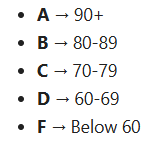

In [ ]:
def assign_grade(total_score):
    if total_score < 50.0:
        return 'F'
    elif 50.0 <= total_score < 60.0:
        return 'D'
    elif 60.0 <= total_score < 70.0:
        return 'C'
    elif 70.0 <= total_score < 80.0:
        return 'B'
    else:
        return 'A'

df['grade'] = df['total'].apply(assign_grade)

In [ ]:
df

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x="dep", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title("Распределение по факультетам")

# Distribution of Extracurricular Participation
sns.countplot(x="active", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("Распределение по внеклассным занятиям")

plt.tight_layout()
plt.show()

**Распределение по полу и возрасту**

In [ ]:
gender_counts = df["gender"].value_counts()
print(gender_counts)

In [ ]:
age_counts = df["age"].value_counts()
print(age_counts)

In [ ]:
dep_counts = df["dep"].value_counts()
print(dep_counts)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors = sns.color_palette("pastel")
wedges, texts, autotexts = axes[0].pie(
    gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
    colors=colors, startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, pctdistance=0.85)
center_circle = plt.Circle((0, 0), 0.3, fc='white', edgecolor='black', linewidth=1.2)
axes[0].add_artist(center_circle)
axes[0].set_title("Распределение по полу", fontsize=14, fontweight="bold")

sns.kdeplot(x='age', data=df, hue="gender", fill=True, palette='husl', ax=axes[1])
axes[1].set_xlabel("age", fontsize=14, color='k')
axes[1].set_ylabel("Плотность", fontsize=14, color='k')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["gender"], hue=df["dep"], order=["М", "Ж"])
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Распределение оценок**

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x="grade", data=df, order=sorted(df["grade"].unique()), palette="coolwarm")
plt.show()

**Лучшие факультеты по баллам**

In [ ]:
best_departments = df.groupby("dep", as_index=False)["total"].mean().sort_values(by="total", ascending=False)
print(best_departments)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=best_departments["dep"], y=best_departments["total"], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Факультет")
plt.ylabel("Баллы")
plt.show()

**10 лучших студентов на каждом факультете**

In [ ]:
departments = df["dep"].unique()

for department in departments:
    top_students = df[df["dep"] == department].nlargest(10, "total")[["name","fam", "total"]]

    print(f"\n 10 студентовn {department} факультета:\n")
    print(top_students.to_string(index=False))
    print("\n" + "="*50)

**Тепловая карта**

In [ ]:
plt.figure(figsize=(10,6))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

**Академическая успеваемость по полу**

In [ ]:
plt.figure(figsize=(6,4))
gender_scores = df.groupby("gender")["total"].mean()
sns.barplot(x=gender_scores.index, y=gender_scores.values, palette="viridis")
plt.xlabel("Пол")
plt.ylabel("Средний балл")
plt.show()

**Влияет ли низкая посещаемость на результаты**

In [ ]:
math_students = df[df["dep"] == "Математика"].copy()
math_students["attendance"] = math_students["attendance"].isnull().astype(int)

plt.figure(figsize=(8, 5))
sns.boxplot(x="attendance", y="total", data=math_students)
plt.xticks([0, 1], ["Посещали", "Пропускали"])
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=math_students["attendance"], y=math_students["total"], estimator=np.mean, errorbar=None)
plt.xticks([0, 1], ["Посещение", "Пропуски"])
plt.ylabel("Баллы")
plt.xlabel("Посещаемость")
plt.show()

**Гистограмма распределения оценок студентов по разным элементам**

In [ ]:
score_columns = ['exam', 'final', 'avg', 'test', 'class', 'project', 'total']

plt.figure(figsize=(12, 6))
df[score_columns].hist(figsize=(12, 8), bins=20, edgecolor='black', layout=(2, 4))
plt.suptitle("Распределение оценок студентов", fontsize=14)
plt.show()

In [ ]:
#boxplot
plt.figure(figsize=(12, 6))
df[score_columns].plot(kind="box", subplots=True, layout=(2, 4), figsize=(12, 8))
plt.suptitle("Boxplots of Student Scores", fontsize=14)
plt.show()

**Анализ распределения оценок**

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["total"], bins=20, kde=True, color="royalblue")
plt.xlabel("total")
plt.ylabel("число студентов")
plt.show()

**Уровень стресса и продолжительность сна**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="stress", y="sleep", data=df, palette="viridis")
plt.show()

**Внеклассные занятия и общий балл**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="active", y="total", data=df, palette="cool")
plt.show()

**Образование родителей и оценка**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="parent_edu", y="total", data=df, palette="viridis")
plt.show()

**Влияет ли образование родителей на итоговые баллы?**

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["grade"], hue=df["parent_edu"], order=["A", "B", "C", "D", "F"])
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Влияет ли более высокий уровень образования родителей на более высокую успеваемость учащихся?**

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["parent_edu"], y=df["total"])
plt.xticks(rotation=45)
plt.xlabel("Образование родителей")
plt.ylabel("Баллы")
plt.show()

**Доход семьи**

In [ ]:
income_counts = df["income"].value_counts()


plt.figure(figsize=(10, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.show()

**Семейный доход и академическая успеваемость**

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="income", hue="grade", palette="viridis")
plt.xlabel("Доход")
plt.ylabel("Число студентов")
plt.legend(title="Оценка")
plt.xticks(rotation=45)
plt.show()

**Как семейный доход связан с участием во внеклассных мероприятиях?**

In [ ]:
ct = pd.crosstab(df['income'], df['active'])
print(ct)

In [ ]:
ct.plot(kind='bar', stacked=True)
plt.title('Участие во внеклассных мероприятиях по уровню дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество студентов')
plt.xticks(rotation=0)
plt.legend(title='Внеклассные занятия')
plt.show()

In [ ]:
ct_pct = pd.crosstab(df['income'], df['active'], normalize='index') * 100
ct_pct.plot(kind='bar', stacked=True)
plt.title('Процент студентов, участвующих во внеклассных мероприятиях')
plt.xlabel('Уровень дохода')
plt.ylabel('Процент (%)')
plt.xticks(rotation=0)
plt.legend(title='Внеклассные занятия')
plt.show()

**Учебные часы и академическая успеваемость**

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["study_hours"], y=df["total"], alpha=0.6)
plt.xlabel("Учебные часы в неделю")
plt.ylabel("Баллы")
plt.show()

In [ ]:
corr = df["study_hours"].corr(df["total"])
print(f"Корреляция: {corr:.2f}")

In [ ]:
score_columns = ['exam', 'final', 'avg', 'test', 'class', 'project']

plt.figure(figsize=(12,6))
for i, col in enumerate(score_columns, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df["study_hours"], y=df[col], alpha=0.5)
    plt.title(f"Study Hours vs. {col}")
    plt.xlabel("Study Hours per Week")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["grade"], y=df["study_hours"])
plt.xlabel("grade")
plt.ylabel("Study Hours per Week")
plt.show()

**Часы сна и академическая успеваемость**

In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(score_columns, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df["sleep"], y=df[col], alpha=0.5)
    plt.title(f"Sleep Hours vs. {col}")
    plt.xlabel("Часов сна")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
avg_sleep = df.groupby("grade")["sleep"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="grade", y="sleep", data=avg_sleep)
plt.xlabel("Оценка")
plt.ylabel("Среднее часов сна")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["attendance"], y=df["total"], alpha=0.5)
plt.xlabel("Посещаемость")
plt.ylabel("Баллы")
plt.show()

In [ ]:
df["Attendance_Level"] = pd.cut(
    df["attendance"],
    bins=[0, 50, 80, 100],
    labels=["Low", "Medium", "High"]
)

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["grade"], hue=df["Attendance_Level"])
plt.xlabel("Оценка")
plt.ylabel("Уровень")
plt.show()

**Доступ в Интернет дома и академическая успеваемость**

In [ ]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x="internet", palette="coolwarm")
plt.xlabel("Доступ к интернету")
plt.ylabel("Число студентов")
plt.show()

In [ ]:
# Percentage stacked bar chart for grade distribution
plt.figure(figsize=(10, 6))
internet_grade_counts = df.groupby(["internet", "grade"]).size().unstack()
internet_grade_counts = internet_grade_counts.div(internet_grade_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

internet_grade_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
plt.xlabel("Доступ к интернету")
plt.ylabel("Процент студентов")
plt.legend(title="Оценка")
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="total", hue="internet", bins=30, kde=True, palette="coolwarm", alpha=0.7)
plt.xlabel("total")
plt.ylabel("Число студентов")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="internet", y="total", palette="coolwarm")
plt.xlabel("Интернет")
plt.ylabel("Баллы")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="internet", y="study_hours", palette="coolwarm")
plt.xlabel("Интернет")
plt.ylabel("Часы учебы в неделю")
plt.show()

✅ Доступ в интернет не оказывает существенного влияния на оценки — распределение баллов в обеих группах схожее.
✅ Существенной разницы в учебных часах между учащимися с доступом в интернет и без него нет.
✅ Общие баллы распределены равномерно в обеих группах, что означает, что доступ в интернет не является значимым предиктором успеваемости.

Мы проанализировали доступ в интернет с помощью трёх различных графиков:
1️⃣ Гистограмма: показывает распределение оценок для учащихся с доступом в интернет и без него.
2️⃣ Диаграмма «скрипка»: показывает распределение общих баллов для обеих групп.
3️⃣ Диаграмма ящиков: сравнивает количество учебных часов в неделю в зависимости от доступа в интернет.

**Внеклассная деятельность и академическая успеваемость**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="total", hue="active", bins=30, kde=True, palette="coolwarm", alpha=0.7)
plt.xlabel("Баллы")
plt.ylabel("Число студентов")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="active", y="total", estimator=np.mean, palette="coolwarm")
plt.xlabel("Участие во внеклассных мероприятиях")
plt.ylabel("Средний общий балл")
plt.show()

Ключевые выводы
✅ Учащиеся, занимающиеся внеклассной деятельностью, как правило, имеют несколько более высокий средний общий балл.
✅ Разница незначительна, что говорит о том, что другие факторы в большей степени влияют на академическую успеваемость.

**Уровень стресса и оценка**

In [ ]:
avg_stress = df.groupby("grade")["stress"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="grade", y="stress", data=avg_stress)
plt.xlabel("Grade")
plt.ylabel("Average Stress Level (1-10)")
plt.show()

**Режим сна и академическая успеваемость**

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="sleep", y="total", alpha=0.5, color="blue")
plt.xlabel("sleep")
plt.ylabel("total")
plt.show()

Ключевые выводы

✅ Учащиеся, которые спят 6–8 часов, как правило, демонстрируют более высокие результаты.

✅ Слишком короткий (<5 часов) или слишком длинный (>9 часов) сон связан с немного более низкими баллами.

✅ Однако эта связь слабая, то есть сон — лишь один из многих факторов, влияющих на успеваемость.


📊 Диаграмма рассеяния: общий балл против часов сна. Эта диаграмма рассеяния визуализирует связь между часами сна за ночь и общими академическими баллами.

In [ ]:
df[['study_hours', 'stress', 'sleep']].corr()

**Разобъем студентов на группы по количеству учебных часов и посмотрим, как меняются стресс и сон.**

In [ ]:
# Создание категорий по учебным часам
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40+']
df['учебные_часы_группы'] = pd.cut(df['study_hours'], bins=bins, labels=labels)

# Boxplot: стресс по группам учебных часов
sns.boxplot(x='учебные_часы_группы', y='stress', data=df)
plt.title('Уровень стресса по группам учебных часов')
plt.show()

# То же самое для сна
sns.boxplot(x='учебные_часы_группы', y='sleep', data=df)
plt.title('Количество сна по группам учебных часов')
plt.show()

**Образование родителей и семейный доход**

Мы изучили, встречаются ли отсутствующие данные чаще в группах с определенным доходом, чтобы проверить, реже ли семьи с низким доходом сообщают об уровне своего образования.

In [ ]:
# @title Текст заголовка по умолчанию
plt.figure(figsize=(10, 5))
sns.barplot(x=df["income"], y=df["parent_edu"].isnull(), estimator=np.mean)
plt.title("Missing Parent Education Level by Family Income Level")
plt.xlabel("Доход")
plt.ylabel("Доля пропущенных значений")
plt.show()

**Отсутствие информации об образовании родителей и доступ к Интернету**

Мы проанализировали, есть ли у учащихся, не имеющих доступа к Интернету дома, тенденция к отсутствию данных об образовании родителей, поскольку это может указывать на связь с социально-экономическим положением.

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x=df["internet"],y=df["parent_edu"].isnull(), estimator=np.mean)
plt.xlabel("Наличие интернета")
plt.ylabel("(%) Значения уровня образования родителей")
plt.show()

**Влияет ли отсутствие обучения родителей на успеваемость учащихся?**

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["parent_edu"].isnull(), y=df["total"])
plt.xticks([0, 1], ["Yes", "Unknow"])
plt.ylabel("Баллы")
plt.show()

In [ ]:
# Уровень стресса vs учебные часы
sns.scatterplot(x='study_hours', y='stress', data=df)
plt.title('Учебные часы vs Уровень стресса')
plt.show()

# Часы сна vs учебные часы
sns.scatterplot(x='study_hours', y='sleep', data=df)
plt.title('Учебные часы vs Количество сна')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print(f"p-value: {p}")